# Scatter Density vs. Violin Plot

This notebook gives several examples to compare the dot density vs. violin plot options for summary_plot.

In [1]:
import xgboost

import shap

# train xgboost model on diabetes data:
X, y = shap.datasets.diabetes()
bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's prediction using SHAP values on the first 1000 training data samples
shap_values = shap.TreeExplainer(bst).shap_values(X)

## Layered violin plot

Without color, this plot can simply display the distribution of importance for each variable as a standard violin plot.

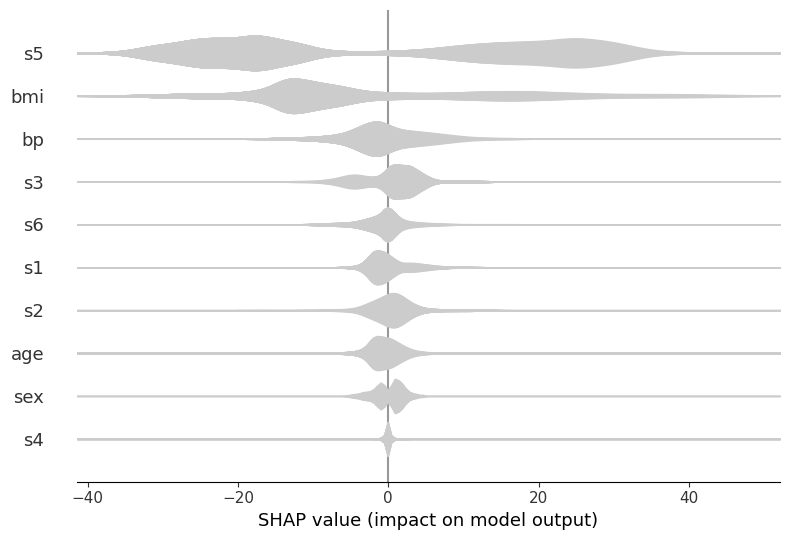

In [2]:
shap.summary_plot(shap_values[:1000, :], X.iloc[:1000, :], plot_type="layered_violin", color="#cccccc")

For example, in the above, we can see that `s5` is the most important variable, and generally it causes either a large positive or negative change in the prediction. However, is it large values of `s5` that cause a positive change and small ones that cause a negative change - or vice versa, or something more complicated? If we use color to represent the largeness/smallness of the feature, then this becomes apparent:

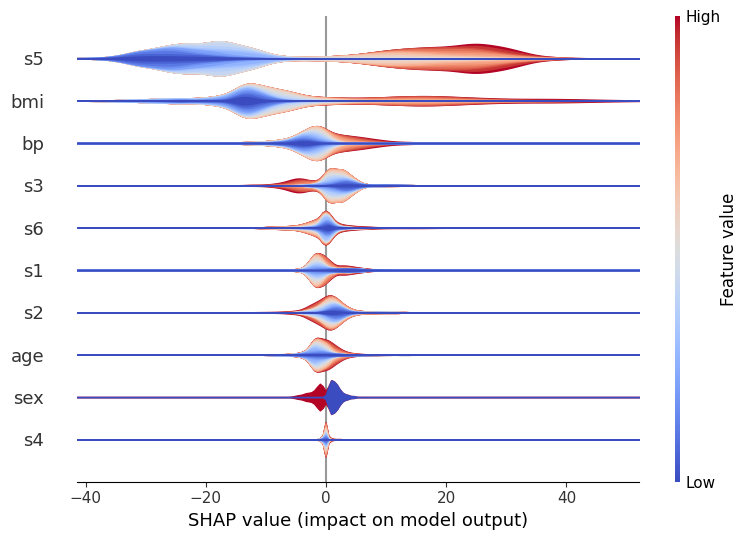

In [3]:
shap.summary_plot(
    shap_values[:1000, :],
    X.iloc[:1000, :],
    plot_type="layered_violin",
    color="coolwarm",
)

Here, red represents large values of a variable, and blue represents small ones. So, it becomes clear that *large* values of `s5` do indeed increase the prediction, and vice versa. You can also see that others (like `s6`) are pretty evenly split, which indicates that while overall they're still important, their interaction is dependent on other variables. (After all, the whole point of a tree model like xgboost is to capture these interactions, so we can't expect to see everything in a single dimension!)

> Note that the order of the color isn't important: each violin is actually a number (`layered_violin_max_num_bins`) of  individual smoothed shapes stacked on top of each other, where each shape corresponds to a certain percentile of the feature (e.g. `the 5-10% percentile of s5 values`). These are always drawn with small values first (and hence closest to the x-axis) and large values last (hence on the 'edge'), and that's why in this case you always see the red on the edge and the blue in the middle. (You could, of course switch this around by using a different color map, but the point is that the order of red inside/outside blue has no inherent meaning.)

There are other options you can play with, if you wish. Most notable is the `layered_violin_max_num_bins` mentioned above. This has an additional effect that if the feature has less than `layered_violin_max_num_bins` unique values, then instead of partitioning each section as as a percentile (the `5-10%` above), we make each section represent a specific value. For example, since `sex` has only two values, here blue will mean male (or female?) and read means female (or male?).

<!-- commenting this out for the public repo since there is a fair amount of opinion here.
#### Pros

- look great
- easily interpretable (with color): people can generally get the idea without having to explain in detail
- both of these meant they're good to show laymen/clients in presentations etc.

#### Cons

- take longer to draw (only relevant if you're doing heaps)
- can be hard to get the smoothing just right
- the code isn't as well supported, so if you want to tweak it, you might have to hack the code yourself-->

## Dot plot

The dot plot combines a scatter plot with density estimation by letting dots pile up when they don't fit. The advantage of this approach is that it does not hide anything behind kernel smoothing, so you see an exact representation of the data.

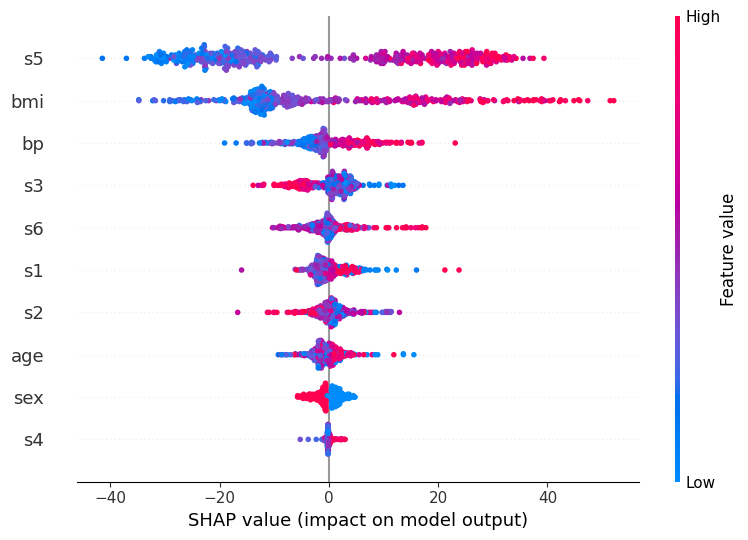

In [4]:
shap.summary_plot(shap_values[:1000, :], X.iloc[:1000, :])

<!--#### Pros

- if you're looking for really fine features, and your data doesn't have the problems below, then this might be better. However, you probably shouldn't be using a graph to discover such fine features.

#### Cons

- generally doesn't look as nice for most data sets
- can be quite noisy - no smoothing etc. This generally makes it harder to interpret the 'obvious' results.
- the plot will depend on the order the dots are drawn (since they'll overlap etc.). In other words it's possible that you could get very different looking plots with the same data. You can get round this somewhat by using a very low opacity - but this then makes the non-overlapping parts of the graph hard to read. 
    - [Note: this issue could be fixed somewhat if the y-value of the dots are given specific meaning (as with the layered violin plot) to avoid plots of different color overlapping. Though then it'd just be the layered violin plot.]
- doesn't support categorical data (see the comment for the layered violin plot).-->

## Violin plot

These are a standard violin plot but with outliers drawn as points. This gives a more accurate representation of the density out the outliers than a kernel density estimated from only a few points. The color represents the average feature value at that position, so red regions high feature values dominate while blue regions low feature values dominate.

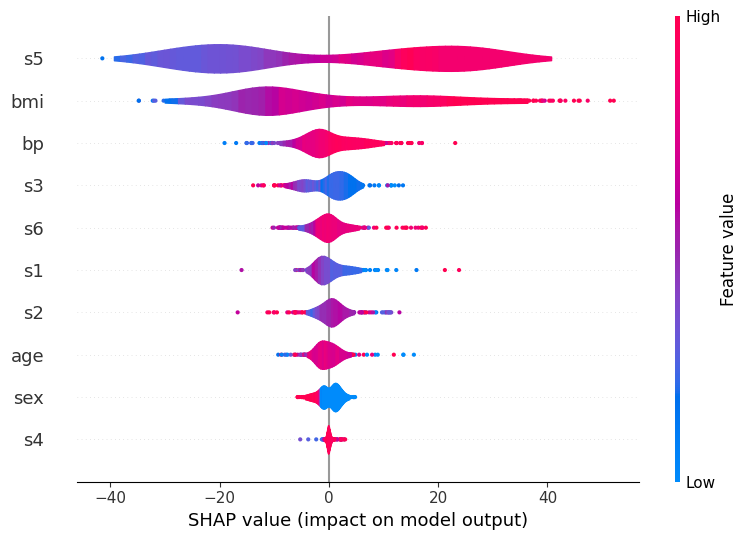

In [5]:
shap.summary_plot(shap_values[:1000, :], X.iloc[:1000, :], plot_type="violin")